In [ ]:
from google.colab import drive
drive.mount('/gdrive')

KeyboardInterrupt: ignored

In [ ]:
cd /gdrive/My\ Drive

/gdrive/My Drive


In [ ]:
cd Hough_transform

/gdrive/My Drive/Hough_transform


In [ ]:
import cv2
import numpy as np
import random
import skimage
from matplotlib import pyplot as plt
import pandas as pd
import time
import math
from google.colab import files
# from scipy.ndimage.filters import uniform_filter
# from scipy.ndimage.measurements import variance

**Noise Generation (Gaussian and Speckle Noise generation)**

In [ ]:
def random_noise(image,v, mode='gaussian', seed=None, clip=True):
      allowedtypes = {
            'gaussian': 'gaussian_values',
            'speckle': 'gaussian_values'}
      mean=0.0
      var=v
      allowedkwargs = {
            'gaussian_values': ['mean', 'var']}
            
      # Detect if a signed image was input
      if image.min() < 0:
          low_clip = -1.
      else:
          low_clip = 0.
      
      if mode == 'gaussian':
              noise = np.random.normal(mean,  np.power(var,0.5),image.shape)
              out = image + noise
      elif mode == 'speckle':
              noise = np.random.normal(mean, var** 0.5,image.shape)
              out = image + image * noise
     
      if clip:
        out = np.clip(out, low_clip, 1.0)
      return out

In [ ]:
img=plt.imread("27/108_3HC.png")
v=input("Enter the noise variance between 0 to 1:")

noised_img_Gaussian=random_noise(img,float(v), mode='gaussian',seed=None,  clip=False,)

noised_img_speckle=random_noise(img,float(v), mode='speckle', seed=None, clip=False)

mixed_noised_img=random_noise(noised_img_Gaussian,float(v), mode='speckle', seed=None, clip=False)



Enter the noise variance between 0 to 1:0.01


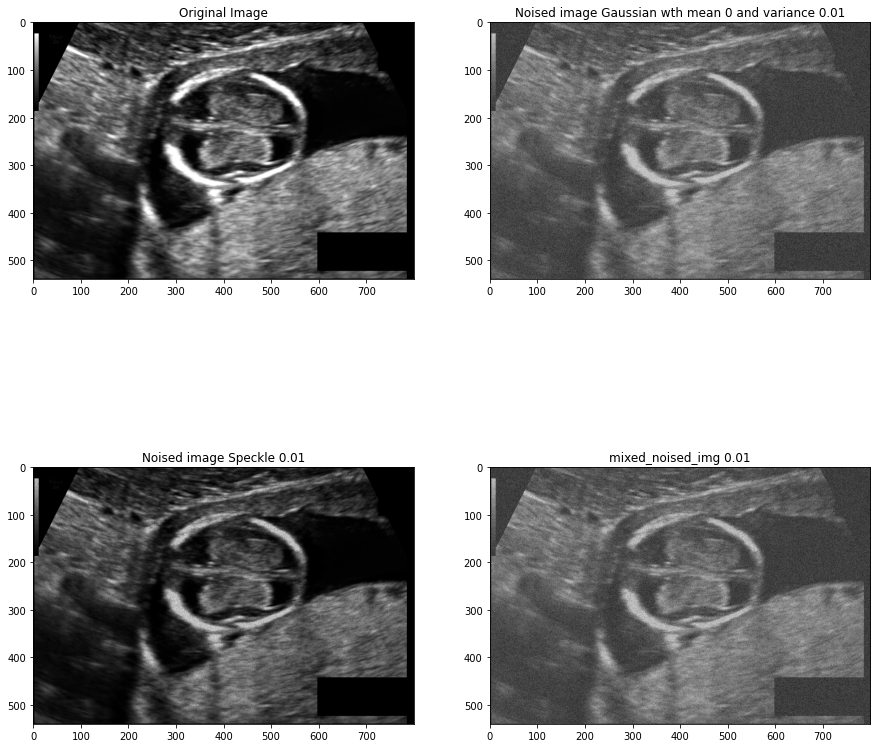

In [ ]:
# Display results
display = [img, noised_img_Gaussian, noised_img_speckle,mixed_noised_img]
label = ['Original Image', 'Noised image Gaussian wth mean 0 and variance {}'.format(v), 'Noised image Speckle {}'.format(v),'mixed_noised_img {}'.format(v)]
fig = plt.figure(figsize=(15,15))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(2,2, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('Noised_img_3.png')
# files.download('Noised_img_3.png')

**Noise Filtering**

1.Mean Filter

In [ ]:
#mean filter
#img = np.float32(noised_img_Gaussian)
kernel = np.ones((5,5),np.float32)/25
Mean_Filtered_img1 = cv2.filter2D(noised_img_Gaussian,-1,kernel)
Mean_Filtered_img2 = cv2.filter2D(noised_img_speckle,-1,kernel)
Mean_Filtered_img3 = cv2.filter2D(mixed_noised_img,-1,kernel)


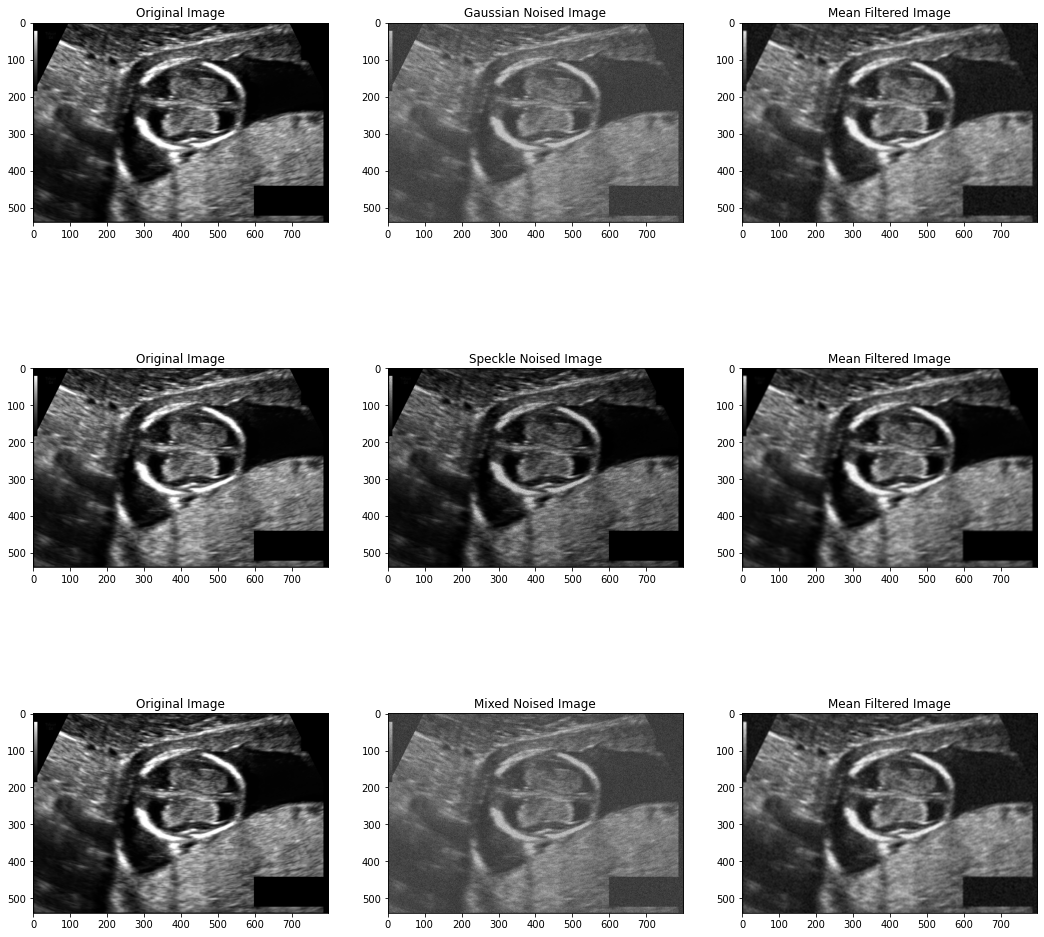

In [ ]:
#Display Image
display = [img, noised_img_Gaussian, Mean_Filtered_img1,img, noised_img_speckle,Mean_Filtered_img2,img, mixed_noised_img, Mean_Filtered_img3]
label = ['Original Image','Gaussian Noised Image', 'Mean Filtered Image','Original Image','Speckle Noised Image', 'Mean Filtered Image','Original Image','Mixed Noised Image', 'Mean Filtered Image']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part1/Mean_Filtered_img.png')
# files.download('out/Part1/Mean_Filtered_img.png')

2.Lee Filter

In [ ]:
#Filtering
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance
#Lee filter
def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

Lee_Filtered_img1= lee_filter(noised_img_Gaussian,5)
Lee_Filtered_img2= lee_filter(noised_img_speckle,5)
Lee_Filtered_img3= lee_filter(mixed_noised_img,5)

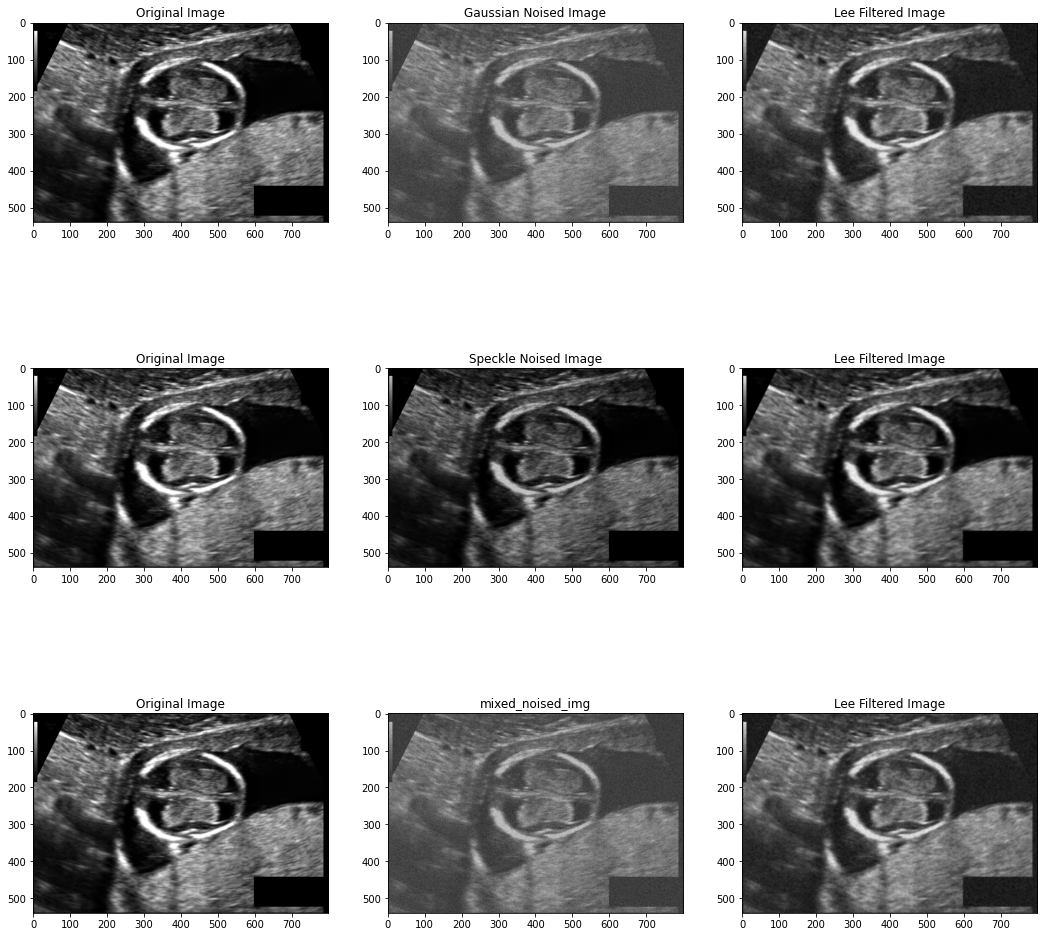

In [ ]:
#Display Image
display = [img, noised_img_Gaussian, Lee_Filtered_img1,img, noised_img_speckle,Lee_Filtered_img2 ,img,mixed_noised_img, Lee_Filtered_img3 ]
label = ['Original Image','Gaussian Noised Image', 'Lee Filtered Image','Original Image','Speckle Noised Image', 'Lee Filtered Image','Original Image','mixed_noised_img','Lee Filtered Image']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part1/Lee_Filtered_img.png')
# files.download('out/Part1/Lee_Filtered_img.png')

**Gaussian Filter**

In [ ]:

def Gaussian_filter_image(image, sigma, scale=None):
    """
    Filters in place
    :param image:
    :param sigma:
    :param scale:
    :return:
    """
    if scale is None:
        # 3 * sigma per half width
        scale =( 6 * sigma) - 1

    kernel = build_gaussian_kernel(sigma, scale)
    # Apply both kernels to the input image
    filtered = convolve_replicate_bounds(image, kernel)
    # filtered = convolve_replicate_bounds(filtered, kernel_y)
    return filtered
def build_gaussian_kernel(sigma, scale):
    """
    Builds
    :param sigma:
    :param scale:
    :return:
    """
    kernel = np.zeros((scale, scale))
    k_len_max = int(scale / 2)
    two_sigma_sq = 2.0 * np.power(sigma, 2)
    one_over_two_pi_sigma_sq = 1.0 / (two_sigma_sq * np.pi)

    for x in range(-k_len_max, k_len_max + 1):
        x_sq = np.power(x, 2)
        for y in range(-k_len_max, k_len_max + 1):
            y_sq = np.power(y, 2)
            power = -1 * (x_sq + y_sq) / two_sigma_sq
            kernel[x + k_len_max][y + k_len_max] = np.exp(power) * one_over_two_pi_sigma_sq

    k_sum = np.sum(kernel)
    if k_sum != 1:
        # Normalize the gaussian filter to sum to 1
        kernel = np.divide(kernel, k_sum)
        return kernel
def convolve_replicate_bounds_point(x, y, image, kernel, constant=1):
    """
    :param x:
    :param y:
    :param image:
    :param kernel:
    :param constant:
    :return:
    """
    max_x, max_y = image.shape
    k_max_x, k_max_y = kernel.shape
    k_max_x = int(k_max_x / 2)
    k_max_y = int(k_max_y / 2)

    convolve_sum = np.int64(0)

    for k_x in range(-k_max_x, k_max_x + 1):
        for k_y in range(-k_max_y, k_max_y + 1):
            adj_x = k_x + x
            adj_y = k_y + y

            if adj_x < 0:
                adj_x = 0
            elif adj_x >= max_x:
                adj_x = max_x - 1

            if adj_y < 0:
                adj_y = 0
            elif adj_y >= max_y:
                adj_y = max_y - 1

            iter_sum = kernel[k_x + k_max_x][k_y + k_max_y] * image[adj_x][adj_y]
            convolve_sum += iter_sum

    return convolve_sum * constant


def convolve_replicate_bounds(image, kernel, constant=1):
    """
    convolved[x][y]
    :param image:
    :param kernel:
    :param constant:
    :return:
    """
    max_x = image.shape[0]
    max_y = image.shape[1]
    convolved = image.copy()

    for x in range(0, max_x):
        for y in range(0, max_y):
            convolved[x][y] = convolve_replicate_bounds_point(x, y, image, kernel, constant)

    return convolved

In [ ]:
# sigma = input("Enter the sigma for gaussian kernel (preferably 1 or 0.5): ")
Gaussian_filtered_image1=Gaussian_filter_image(noised_img_Gaussian, 1)
Gaussian_filtered_image2=Gaussian_filter_image(noised_img_speckle, 1)
Gaussian_filtered_image3=Gaussian_filter_image(mixed_noised_img, 1)

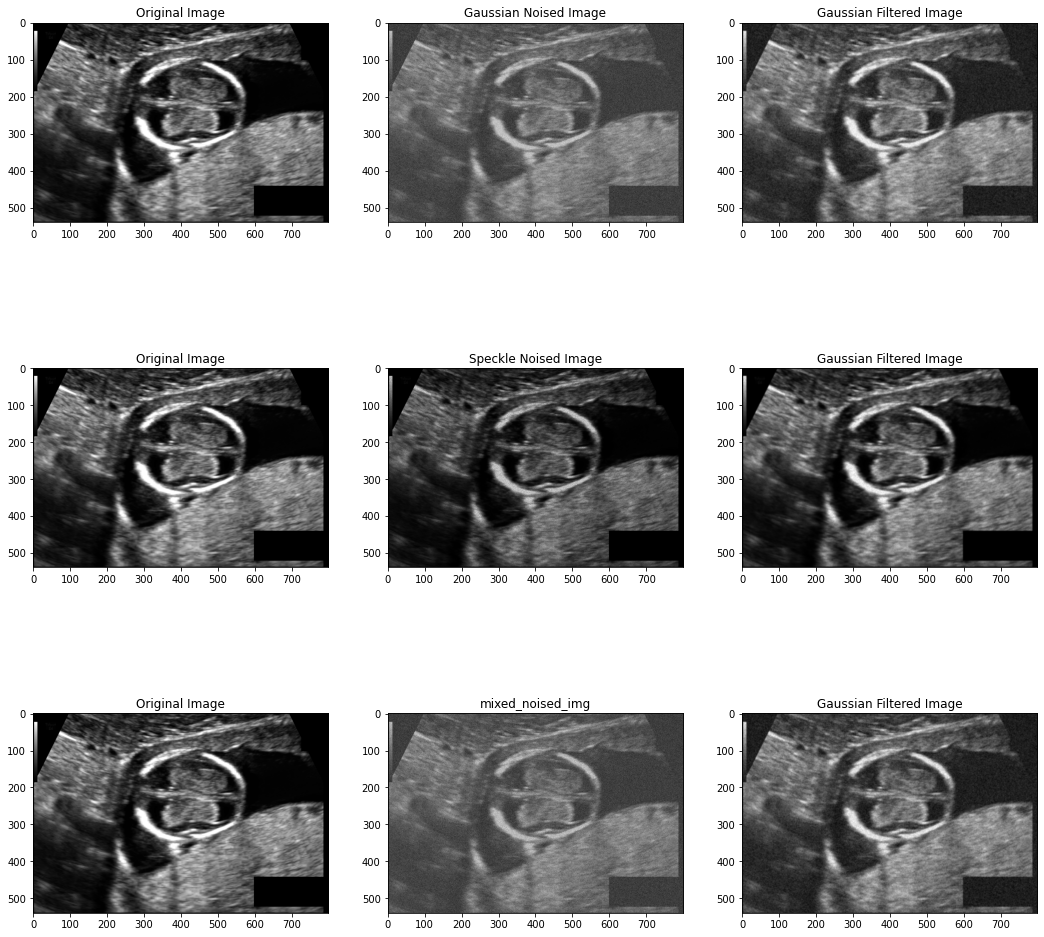

In [ ]:
#Display Image
display = [img, noised_img_Gaussian, Gaussian_filtered_image1,img, noised_img_speckle,Gaussian_filtered_image2 ,img,mixed_noised_img, Gaussian_filtered_image3 ]
label = ['Original Image','Gaussian Noised Image', 'Gaussian Filtered Image','Original Image','Speckle Noised Image', 'Gaussian Filtered Image','Original Image','mixed_noised_img','Gaussian Filtered Image']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part1/Gaussian_Filtered_img.png')
# files.download('out/Part1/Gaussian_Filtered_img.png')

In [ ]:
# Gaussian_difference=noised_img_Gaussian-Gaussian_filtered_image1
# plt.imshow(Gaussian_difference, cmap = 'gray')

**Bilateral Filter**

In [ ]:
def gaussian_function(standard_deviation):
    pi = math.pi
    e = math.e
    sd = standard_deviation
    return lambda x: (1 / (sd * (2 * pi) ** (1 / 2))) * e ** -(x ** 2 / (2 * sd ** 2))
#def apply_bilateral_filter(img,size, sigma_distance, sigma_intensity_difference):
'''
size:window_size
sigma_distance: spatial kernel std.deviation
sigma_intensity_difference:intensity kernel std.deviation
'''

#noisy_image=np.copy(noised_img_Gaussian)
noisy_image=np.copy(noised_img_Gaussian)
size=5
sigma_distance=20
sigma_intensity_difference=25
number_of_rows,number_of_columns=noisy_image.shape
matrix=np.asarray(noisy_image, dtype=float)
halfsize = size // 2
intensity_gaussian_function = gaussian_function(sigma_intensity_difference)
distance_gaussian_function = gaussian_function(sigma_distance)

# the distance mask is the same for every pixel so can build it once now
distance_mask = np.zeros((size, size))
for y in range(-halfsize, halfsize + 1):
    for x in range(-halfsize, halfsize + 1):
        # for each position (x, y), calculate the distance from the central pixel
        distance = np.array([(x ** 2 + y ** 2) ** (1 / 2) ])#for _ in range(3)
        distance_gaussian = np.array([distance_gaussian_function(component) for component in distance])
        distance_mask[halfsize + y][halfsize + x] = distance_gaussian

# calculate the response at every pixel p
# this could be done in parallel but for simplicity I do it one pixel at a time
for row_index in range(number_of_rows):
    for column_index in range(number_of_columns):
        p = matrix[row_index][column_index]
        #neigh = neighbourhood(size, row_index, column_index, number_of_rows, number_of_columns, matrix)
        # PRECONDITIONS 
        if not (0 <= row_index < number_of_rows):
            raise ValueError("Row index out of bounds")
        if not (0 <= column_index < number_of_columns):
            raise ValueError("Column index out of bounds")
      

        # FUNCTION BODY
        p = matrix[row_index][column_index]
        halfsize = size // 2
       
        padded_matrix =np.pad(matrix,pad_width=((halfsize, halfsize), (halfsize, halfsize)), mode="edge")

        # work out adjusted indices
        original_minimum_row_index = row_index - halfsize
        original_maximum_row_index = row_index + halfsize
        original_minimum_column_index = column_index - halfsize
        original_maximum_column_index = column_index + halfsize

        adjusted_minimum_row_index = original_minimum_row_index + halfsize
        adjusted_maximum_row_index = original_maximum_row_index + halfsize
        adjusted_minimum_column_index = original_minimum_column_index + halfsize
        adjusted_maximum_column_index = original_maximum_column_index + halfsize

        # slice the relevant submatrix from the padded matrix
        omega = padded_matrix[adjusted_minimum_row_index:adjusted_maximum_row_index + 1,
                adjusted_minimum_column_index:adjusted_maximum_column_index + 1]

        # must build a unique intensity difference mask for each pixel
        intensity_mask = np.zeros((size, size))
        for y in range(-halfsize, halfsize + 1):
            for x in range(-halfsize, halfsize + 1):
                # for each position (x, y), calculate the difference in intensity
                intensity_difference = abs(p - omega[halfsize + y][halfsize + x])
                intensity_difference_gaussian = np.array(
                    [intensity_gaussian_function(intensity_difference) ])
                intensity_mask[halfsize + y][halfsize + x] = intensity_difference_gaussian

        combined_mask = intensity_mask * distance_mask
        weighting = sum(sum(combined_mask))
        applied_to_omega = combined_mask * omega
        response = sum(sum(applied_to_omega)) / weighting
        matrix[row_index][column_index] = response
   # return matrix

In [ ]:
bilateral_filtered_img1=matrix

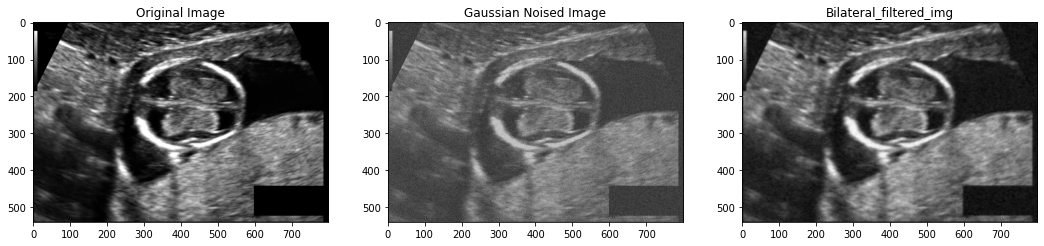

In [ ]:

#Display Image
display = [img, noised_img_Gaussian, bilateral_filtered_img1]
label = ['Original Image','Gaussian Noised Image', 'Bilateral_filtered_img']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part1/bilateral_Filtered_img.png')
# files.download('out/Part1/bilateral_Filtered_img.png')

*This bilateral filtering will take time as it has not been done with parallel processing so above is bilateral filtering for one image*

In [ ]:
def gaussian_function(standard_deviation):
    pi = math.pi
    e = math.e
    sd = standard_deviation
    return lambda x: (1 / (sd * (2 * pi) ** (1 / 2))) * e ** -(x ** 2 / (2 * sd ** 2))
    
def apply_bilateral_filter(img, size, sigma_distance, sigma_intensity_difference):
        '''
        size:window_size
        sigma_distance: spatial kernel std.deviation
        sigma_intensity_difference:intensity kernel std.deviation
        '''
        
        number_of_rows,number_of_columns=img.shape
        matrix=np.asarray(img, dtype=float)
        halfsize = size // 2
        intensity_gaussian_function = gaussian_function(sigma_intensity_difference)
        distance_gaussian_function = gaussian_function(sigma_distance)
        # #def apply_bilateral_filter(img,size, sigma_distance, sigma_intensity_difference):


        # the distance mask is the same for every pixel so can build it once now
        distance_mask = np.zeros((size, size))
        for y in range(-halfsize, halfsize + 1):
            for x in range(-halfsize, halfsize + 1):
                # for each position (x, y), calculate the distance from the central pixel
                distance = np.array([(x ** 2 + y ** 2) ** (1 / 2) ])#for _ in range(3)
                distance_gaussian = np.array([distance_gaussian_function(component) for component in distance])
                distance_mask[halfsize + y][halfsize + x] = distance_gaussian

        # calculate the response at every pixel p
        for row_index in range(number_of_rows):
            for column_index in range(number_of_columns):
                p = matrix[row_index][column_index]
                #neigh = neighbourhood(size, row_index, column_index, number_of_rows, number_of_columns, matrix)
                # PRECONDITIONS 
                if not (0 <= row_index < number_of_rows):
                    raise ValueError("Row index out of bounds")
                if not (0 <= column_index < number_of_columns):
                    raise ValueError("Column index out of bounds")
              

                # FUNCTION BODY
                p = matrix[row_index][column_index]
                halfsize = size // 2
               
                padded_matrix =np.pad(matrix,pad_width=((halfsize, halfsize), (halfsize, halfsize)), mode="edge")

                # work out adjusted indices
                original_minimum_row_index = row_index - halfsize
                original_maximum_row_index = row_index + halfsize
                original_minimum_column_index = column_index - halfsize
                original_maximum_column_index = column_index + halfsize

                adjusted_minimum_row_index = original_minimum_row_index + halfsize
                adjusted_maximum_row_index = original_maximum_row_index + halfsize
                adjusted_minimum_column_index = original_minimum_column_index + halfsize
                adjusted_maximum_column_index = original_maximum_column_index + halfsize

                # slice the relevant submatrix from the padded matrix
                omega = padded_matrix[adjusted_minimum_row_index:adjusted_maximum_row_index + 1,
                        adjusted_minimum_column_index:adjusted_maximum_column_index + 1]

                # must build a unique intensity difference mask for each pixel
                intensity_mask = np.zeros((size, size))
                for y in range(-halfsize, halfsize + 1):
                    for x in range(-halfsize, halfsize + 1):
                        # for each position (x, y), calculate the difference in intensity
                        intensity_difference = abs(p - omega[halfsize + y][halfsize + x])
                        intensity_difference_gaussian = np.array(
                            [intensity_gaussian_function(intensity_difference) ])
                        intensity_mask[halfsize + y][halfsize + x] = intensity_difference_gaussian

                combined_mask = intensity_mask * distance_mask
                weighting = sum(sum(combined_mask))
                applied_to_omega = combined_mask * omega
                response = sum(sum(applied_to_omega)) / weighting
                matrix[row_index][column_index] = response
        return matrix

In [ ]:
#bilateral_filtered_img1=apply_bilateral_filter(noised_img_Gaussian, 5, 20, 25)
# bilateral_filtered_img2=apply_bilateral_filter(noised_img_speckle, 5, 20, 25)
# bilateral_filtered_img3=apply_bilateral_filter(mixed_noised_img, 5, 20, 25)
#blur = cv2.bilateralFilter(bi_noised_img,5,20,25) ###usig inbuilt command

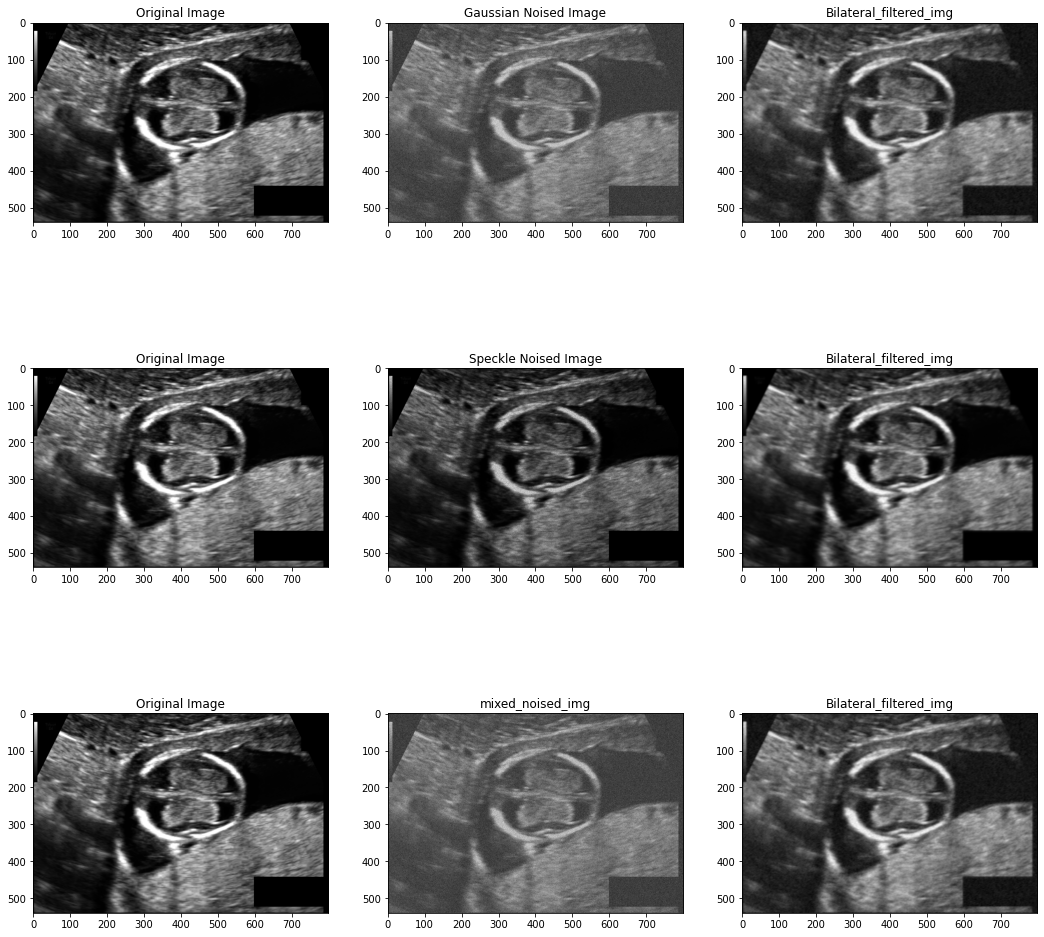

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
##Display Image
# display = [img, noised_img_Gaussian, bilateral_filtered_img1,img, noised_img_speckle,bilateral_filtered_img2 ,img,mixed_noised_img, bilateral_filtered_img3 ]
# label = ['Original Image','Gaussian Noised Image', 'Bilateral_filtered_img','Original Image','Speckle Noised Image', 'Bilateral_filtered_img','Original Image','mixed_noised_img','Bilateral_filtered_img']
# fig = plt.figure(figsize=(18,18))

# for i in range(len(display)):
#   p=np.int(len(display)/2)
#   fig.add_subplot(3 ,3 , i+1)
#   plt.imshow(display[i], cmap = 'gray')
#   plt.title(label[i])
# plt.show()

## fig.savefig('out/Part1/bilateral_Filtered_img.png')
## files.download('out/Part1/bilateral_Filtered_img.png')

In [ ]:
np.max(noised_img_Gaussian)

1.4091902368105451

In [ ]:
bi_noised_img_Gaussian=np.float32(noised_img_Gaussian)
bi_noised_img_speckle=np.float32(noised_img_speckle)
bi_mixed_noised_img=np.float32(mixed_noised_img)
Bilateral_filter_inbuit_img1 = cv2.bilateralFilter(bi_noised_img_Gaussian,5,20,25) ###usig inbuilt command
Bilateral_filter_inbuit_img2 = cv2.bilateralFilter(bi_noised_img_speckle,5,20,25) 
Bilateral_filter_inbuit_img3 = cv2.bilateralFilter(bi_mixed_noised_img,5,20,25) 

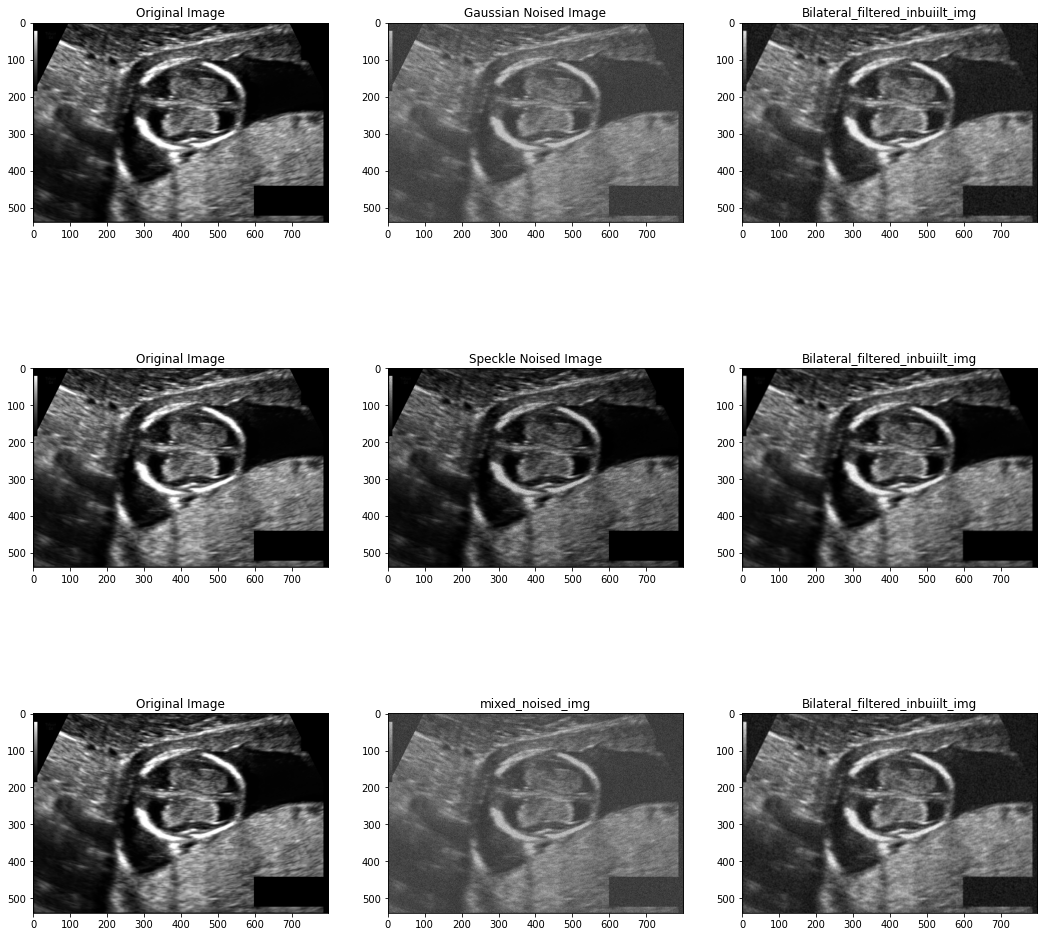

In [ ]:
#Display Image
display = [img, noised_img_Gaussian, Bilateral_filter_inbuit_img1,img, noised_img_speckle,Bilateral_filter_inbuit_img2 ,img,mixed_noised_img, Bilateral_filter_inbuit_img3 ]
label = ['Original Image','Gaussian Noised Image', 'Bilateral_filtered_inbuiilt_img','Original Image','Speckle Noised Image', 'Bilateral_filtered_inbuiilt_img','Original Image','mixed_noised_img','Bilateral_filtered_inbuiilt_img']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])
plt.show()

**Wiener Filter**

In [ ]:
# wiener filter
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	wiener = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	wiener_filtered = wiener * kernel
	wiener_filtered = np.abs(ifft2(wiener_filtered))
	return wiener_filtered

def gaussian_kernel(kernel_size = 5):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h


In [ ]:
# Apply Wiener Filter
kernel = gaussian_kernel(5)
wiener_filtered_img1 = wiener_filter(noised_img_Gaussian, kernel, K = 10)  #SNR taken as 10.
wiener_filtered_img2 = wiener_filter(noised_img_speckle, kernel, K = 10)
wiener_filtered_img3 = wiener_filter(mixed_noised_img, kernel, K = 10)

In [ ]:
#Apply Inbuilt Wiener Filter
from scipy.signal.signaltools import wiener
wiener_filtered_inbuilt_img1 = wiener(noised_img_Gaussian, (5, 5))
wiener_filtered_inbuilt_img2 = wiener(noised_img_speckle, (5, 5))
wiener_filtered_inbuilt_img3 = wiener(mixed_noised_img,  (5, 5))

/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


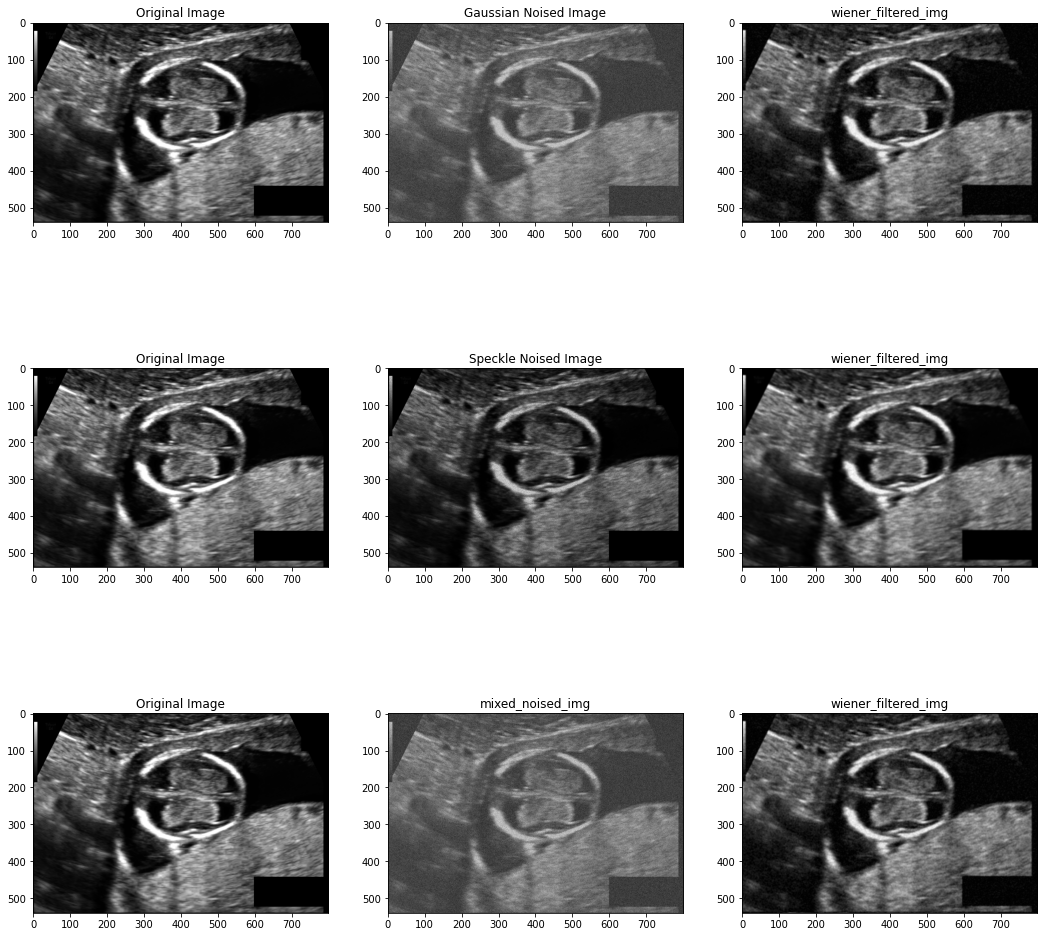

In [ ]:
#Display Image
display = [img, noised_img_Gaussian, wiener_filtered_img1,img, noised_img_speckle,wiener_filtered_img2 ,img,mixed_noised_img, wiener_filtered_img3 ]
label = ['Original Image','Gaussian Noised Image', 'wiener_filtered_img','Original Image','Speckle Noised Image', 'wiener_filtered_img','Original Image','mixed_noised_img','wiener_filtered_img']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part1/weiner_Filtered_img.png')
# files.download('out/Part1/weiner_Filtered_img.png')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fe186b816a0>)

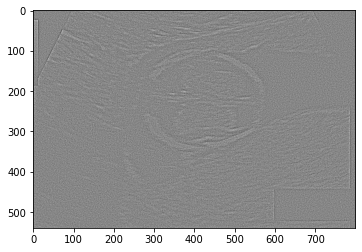

In [ ]:
# # diff=img-bilateral_filtered_img
# diff1=noised_img_Gaussian-bilateral_filtered_img1
# diff=bilateral_filtered_img1-matrix
# plt.figure(),plt.imshow(diff1,cmap='gray')

**PSNR Calculation and Residual Display**

In [ ]:
#PSNR
def calculate_psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

In [ ]:
#Psnr for Gaussian Noise with different filter  
psnr_noised_Gaussian_and_mean=calculate_psnr(noised_img_Gaussian, Mean_Filtered_img1, max_value=255)
psnr_noised_Gaussian_and_Lee=calculate_psnr(noised_img_Gaussian, Lee_Filtered_img1, max_value=255)
psnr_noised_Gaussian_and_Gaussian=calculate_psnr(noised_img_Gaussian, Gaussian_filtered_image1, max_value=255)
psnr_noised_Gaussian_and_Bilateral=calculate_psnr(noised_img_Gaussian, bilateral_filtered_img1, max_value=255)
psnr_noised_Gaussian_and_Bilateral_inbuilt=calculate_psnr(bi_noised_img_Gaussian, Bilateral_filter_inbuit_img1, max_value=255)
psnr_noised_Gaussian_and_weiner=calculate_psnr(noised_img_Gaussian, wiener_filtered_img1, max_value=255)
psnr_noised_Gaussian_and_weiner_inbuilt=calculate_psnr(noised_img_Gaussian, wiener_filtered_inbuilt_img1, max_value=255)
print('PSNR values for Gaussian Noise and different filtered image:')
print('psnr_noised_Gaussian_and_mean: {}'.format(psnr_noised_Gaussian_and_mean))
print('psnr_noised_Gaussian_and_Lee: {}'.format(psnr_noised_Gaussian_and_Lee))
print('psnr_noised_Gaussian_and_Gaussian: {}'.format(psnr_noised_Gaussian_and_Gaussian))
print('psnr_noised_Gaussian_and_Bilateral: {}'.format(psnr_noised_Gaussian_and_Bilateral))
print('psnr_noised_Gaussian_and_Bilateral_inbuilt: {}'.format(psnr_noised_Gaussian_and_Bilateral_inbuilt))
print('psnr_noised_Gaussian_and_weiner: {}'.format(psnr_noised_Gaussian_and_weiner))
print('psnr_noised_Gaussian_and_wiener_inbuilt: {}'.format(psnr_noised_Gaussian_and_weiner_inbuilt))
#Bilateral_filter_inbuit_img1 = cv2.bilateralFilter(bi_noised_img_Gaussian,5,20,25)


PSNR values for Gaussian Noise and different filtered image:
psnr_noised_Gaussian_and_mean: 67.93972911719015
psnr_noised_Gaussian_and_Lee: 69.7377164511373
psnr_noised_Gaussian_and_Gaussian: 69.1723468790522
psnr_noised_Gaussian_and_Bilateral: 68.11017035584965
psnr_noised_Gaussian_and_Bilateral_inbuilt: 68.29426818692546
psnr_noised_Gaussian_and_weiner: 57.89115367059274
psnr_noised_Gaussian_and_wiener_inbuilt: 68.90545613252029


In [ ]:
#Psnr for Speckle Noise with different filter  
psnr_noised_Speckle_and_mean=calculate_psnr(noised_img_speckle, Mean_Filtered_img2, max_value=255)
psnr_noised_Speckle_and_Lee=calculate_psnr(noised_img_speckle, Lee_Filtered_img2, max_value=255)
psnr_noised_Speckle_and_Gaussian=calculate_psnr(noised_img_speckle, Gaussian_filtered_image2, max_value=255)
#psnr_noised_Speckle_and_Bilateral=calculate_psnr(noised_img_speckle, bilateral_filtered_img2, max_value=255)
psnr_noised_speckle_and_Bilateral_inbuilt=calculate_psnr(bi_noised_img_speckle, Bilateral_filter_inbuit_img2, max_value=255)
psnr_noised_speckle_and_weiner=calculate_psnr(noised_img_speckle, wiener_filtered_img2, max_value=255)
psnr_noised_Speckle_and_weiner_inbuilt=calculate_psnr(noised_img_speckle, wiener_filtered_inbuilt_img2, max_value=255)
print('PSNR values for Speckle Noise and different filtered image:')
print('psnr_noised_Speckle_and_mean: {}'.format(psnr_noised_Speckle_and_mean))
print('psnr_noised_Speckle_and_Lee: {}'.format(psnr_noised_Speckle_and_Lee))
print('psnr_noised_Speckle_and_Gaussian: {}'.format(psnr_noised_Speckle_and_Gaussian))
#print('psnr_noised_Speckle_and_Bilateral: {}'.format(psnr_noised_Speckle_and_Bilateral))
print('psnr_noised_Speckle_and_Bilateral_inbuilt: {}'.format(psnr_noised_speckle_and_Bilateral_inbuilt))
print('psnr_noised_Speckle_and_weiner: {}'.format(psnr_noised_Speckle_and_weiner))
print('psnr_noised_Speckle_and_wiener_inbuilt: {}'.format(psnr_noised_Speckle_and_weiner_inbuilt))

PSNR values for Speckle Noise and different filtered image:
psnr_noised_Speckle_and_mean: 75.15344094409963
psnr_noised_Speckle_and_Lee: 76.81910848145202
psnr_noised_Speckle_and_Gaussian: 77.39446727166693
psnr_noised_Speckle_and_Bilateral_inbuilt: 76.38097679201772
psnr_noised_Speckle_and_weiner: 58.27409885923246
psnr_noised_Speckle_and_wiener_inbuilt: 78.55206390987539


In [ ]:
#Psnr for Mixed Noise with different filter  
psnr_noised_Mixed_and_mean=calculate_psnr(mixed_noised_img, Mean_Filtered_img3, max_value=255)
psnr_noised_Mixed_and_Lee=calculate_psnr(mixed_noised_img, Lee_Filtered_img3, max_value=255)
psnr_noised_Mixed_and_Gaussian=calculate_psnr(mixed_noised_img, Gaussian_filtered_image3, max_value=255)
#psnr_noised_Mixed_and_Bilateral=calculate_psnr(mixed_noised_img, bilateral_filtered_img2, max_value=255)
psnr_noised_Mixed_and_Bilateral_inbuilt=calculate_psnr(bi_noised_img_speckle, Bilateral_filter_inbuit_img3, max_value=255)
psnr_noised_Mixed_and_weiner=calculate_psnr(mixed_noised_img, wiener_filtered_img3, max_value=255)
psnr_noised_Mixed_and_weiner_inbuilt=calculate_psnr(mixed_noised_img, wiener_filtered_inbuilt_img3, max_value=255)
print('PSNR values for Mixed Noise and different filtered image:')
print('psnr_noised_Mixed_and_mean: {}'.format(psnr_noised_Mixed_and_mean))
print('psnr_noised_Mixed_and_Lee: {}'.format(psnr_noised_Mixed_and_Lee))
print('psnr_noised_Mixed_and_Gaussian: {}'.format(psnr_noised_Mixed_and_Gaussian))
#print('psnr_noised_Mixed_and_Bilateral: {}'.format(psnr_noised_Mixed_and_Bilateral))
print('psnr_noised_Mixed_and_Bilateral_inbuilt: {}'.format(psnr_noised_Mixed_and_Bilateral_inbuilt))
print('psnr_noised_Mixed_and_weiner: {}'.format(psnr_noised_Mixed_and_weiner))
print('psnr_noised_Mixed_and_wiener_inbuilt: {}'.format(psnr_noised_Mixed_and_weiner_inbuilt))

PSNR values for Mixed Noise and different filtered image:
psnr_noised_Mixed_and_mean: 67.47962916960819
psnr_noised_Mixed_and_Lee: 69.41273782044105
psnr_noised_Mixed_and_Gaussian: 68.69033166030684
psnr_noised_Mixed_and_Bilateral_inbuilt: 74.2183416216738
psnr_noised_Mixed_and_weiner: 57.84367233814947
psnr_noised_Mixed_and_wiener_inbuilt: 68.55708493518316


In [ ]:
## Residual for Gaussian noise
Gaussian_noise_difference1=noised_img_Gaussian- Mean_Filtered_img1
Gaussian_noise_difference2=noised_img_Gaussian- Lee_Filtered_img1
Gaussian_noise_difference3=noised_img_Gaussian- Gaussian_filtered_image1
Gaussian_noise_difference4=noised_img_Gaussian- bilateral_filtered_img1
Gaussian_noise_difference4=noised_img_Gaussian- Bilateral_filter_inbuit_img1
Gaussian_noise_difference5=noised_img_Gaussian- wiener_filtered_img1
Gaussian_noise_difference6=noised_img_Gaussian- wiener_filtered_inbuilt_img1


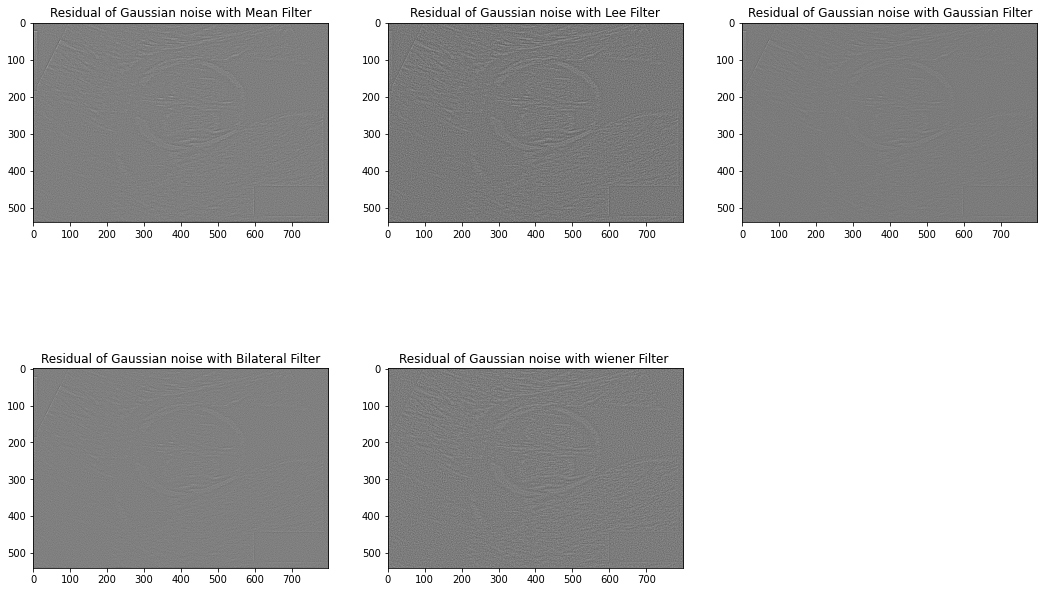

In [ ]:
#Display Image
display = [Gaussian_noise_difference1,Gaussian_noise_difference2,Gaussian_noise_difference3,Gaussian_noise_difference4,Gaussian_noise_difference6 ]
label = ['Residual of Gaussian noise with Mean Filter', 'Residual of Gaussian noise with Lee Filter','Residual of Gaussian noise with Gaussian Filter','Residual of Gaussian noise with Bilateral Filter','Residual of Gaussian noise with wiener Filter ']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part1/residue_Gaussiannoise_Filtered_img.png')
# files.download('out/Part1/residue_Gaussiannoise_Filtered_img.png')

In [ ]:
## Residual for speckle noise
Speckle_noise_difference1=noised_img_speckle- Mean_Filtered_img2
Speckle_noise_difference2=noised_img_speckle- Lee_Filtered_img2
Speckle_noise_difference3=noised_img_speckle- Gaussian_filtered_image2
Speckle_noise_difference4=noised_img_speckle- Bilateral_filter_inbuit_img2
Speckle_noise_difference5=noised_img_speckle- wiener_filtered_img2
Speckle_noise_difference6=noised_img_speckle- wiener_filtered_inbuilt_img2

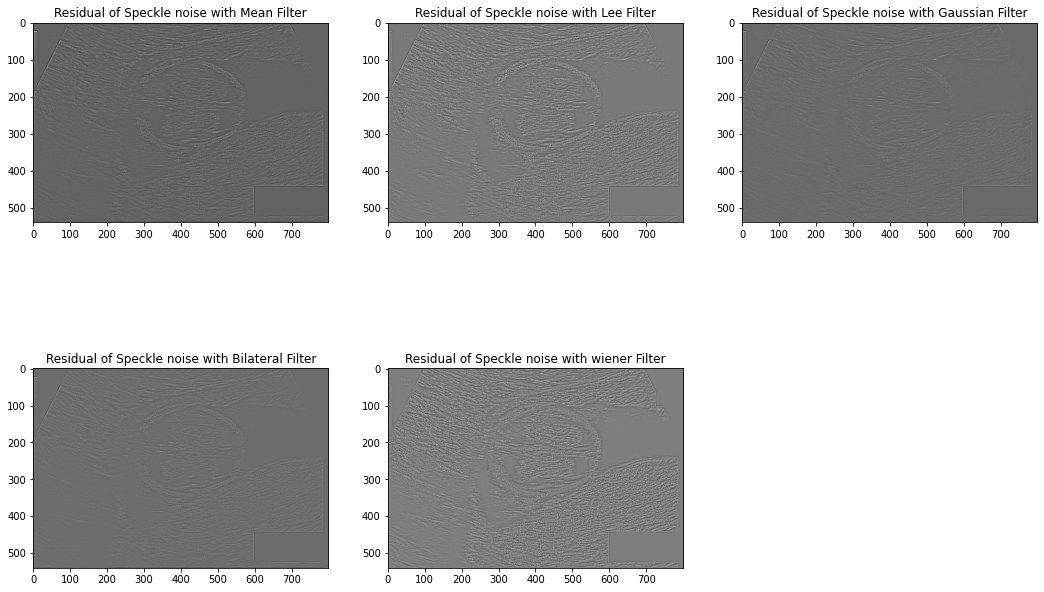

In [ ]:
#Display Image
display = [Speckle_noise_difference1,Speckle_noise_difference2,Speckle_noise_difference3,Speckle_noise_difference4,Speckle_noise_difference6 ]
label = ['Residual of Speckle noise with Mean Filter', 'Residual of Speckle noise with Lee Filter','Residual of Speckle noise with Gaussian Filter','Residual of Speckle noise with Bilateral Filter','Residual of Speckle noise with wiener Filter']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()

In [ ]:
## Residual for mixed noise
Mixed_noise_difference1=mixed_noised_img- Mean_Filtered_img3
Mixed_noise_difference2=mixed_noised_img- Lee_Filtered_img3
Mixed_noise_difference3=mixed_noised_img- Gaussian_filtered_image3
Mixed_noise_difference4=mixed_noised_img- Bilateral_filter_inbuit_img3
Mixed_noise_difference5=mixed_noised_img- wiener_filtered_img3
Mixed_noise_difference6=mixed_noised_img- wiener_filtered_inbuilt_img3

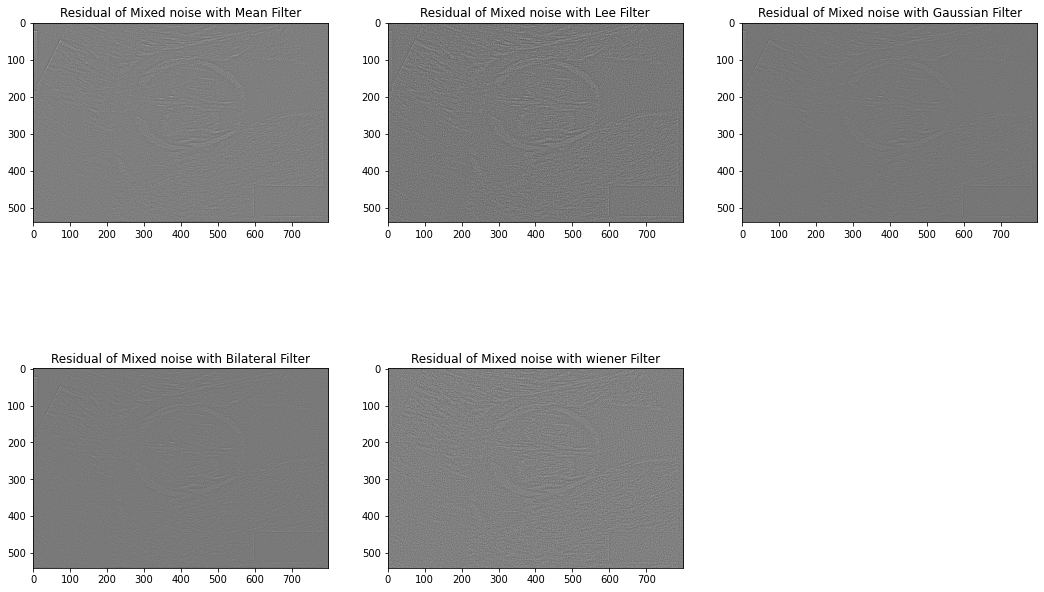

In [ ]:
#Display Image
display = [Mixed_noise_difference1,Mixed_noise_difference2,Mixed_noise_difference3,Mixed_noise_difference4,Mixed_noise_difference6 ]
label = ['Residual of Mixed noise with Mean Filter', 'Residual of Mixed noise with Lee Filter','Residual of Mixed noise with Gaussian Filter','Residual of Mixed noise with Bilateral Filter','Residual of Mixed noise with wiener Filter']
fig = plt.figure(figsize=(18,18))

for i in range(len(display)):
  p=np.int(len(display)/2)
  fig.add_subplot(3 ,3 , i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()

In [ ]:
np.max(img)

0.9529412